# Benjamin Lutz
### Grayscale Conversion and Gradient-Based Motion Estimation

## 1. Convert to gray scale

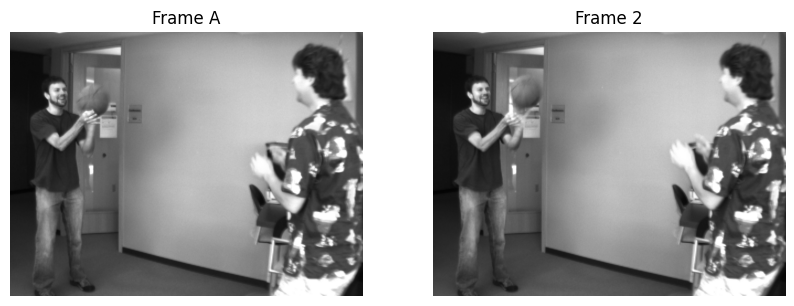

Optical Flow for frame1_a and frame1_b


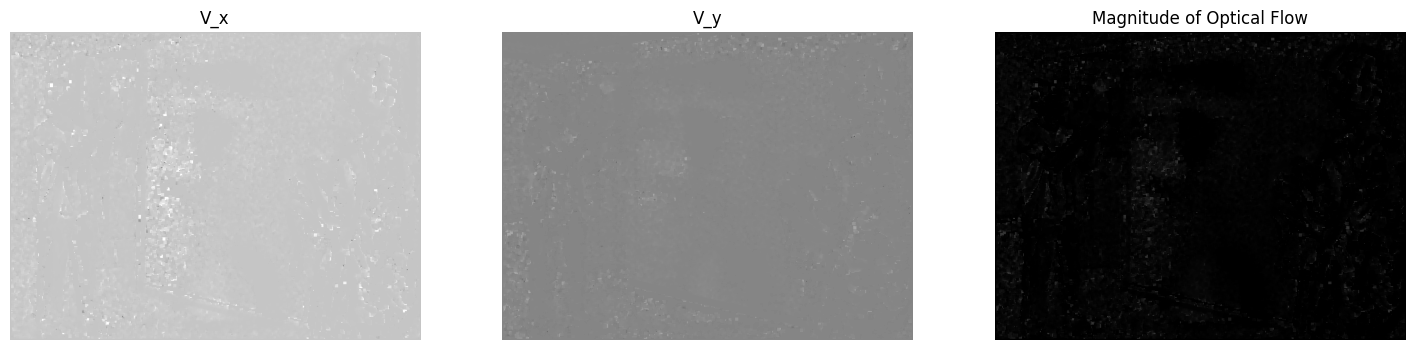

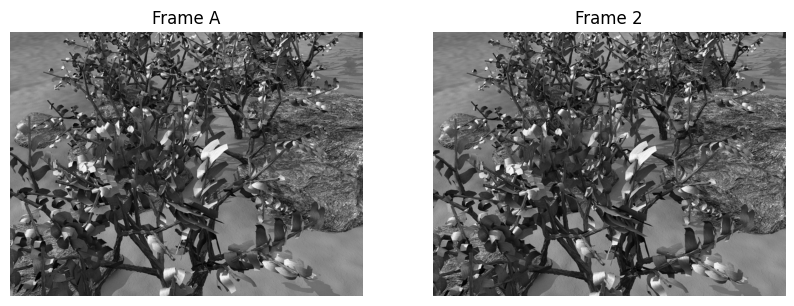

Optical Flow for frame2_a and frame2_b


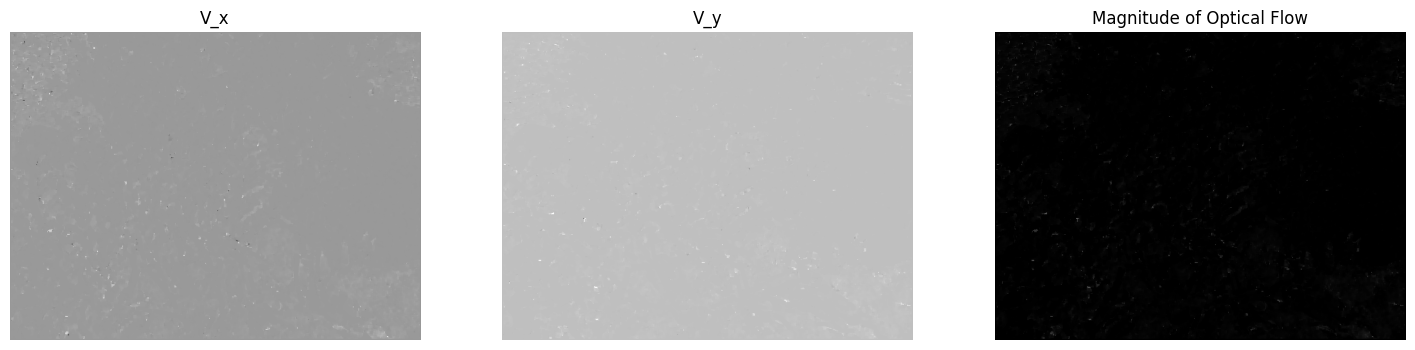

In [41]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Convert image to grayscale
def to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute image gradients
def compute_gradients(image):
    g_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    g_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    I_x = cv2.filter2D(image, -1, g_x)
    I_y = cv2.filter2D(image, -1, g_y)
    
    return I_x, I_y

# Compute optical flow using Lucas-Kanade method
def lucas_kanade_optical_flow(frame1, frame2, window_size=5):
    frame1_gray = to_grayscale(frame1)
    frame2_gray = to_grayscale(frame2)
    
    I_x, I_y = compute_gradients(frame1_gray)
    I_t = frame2_gray - frame1_gray

    half_window = window_size // 2
    V_x = np.zeros(frame1_gray.shape)
    V_y = np.zeros(frame1_gray.shape)
    
    for i in range(half_window, frame1_gray.shape[0] - half_window):
        for j in range(half_window, frame1_gray.shape[1] - half_window):
            I_x_window = I_x[i-half_window:i+half_window+1, j-half_window:j+half_window+1].flatten()
            I_y_window = I_y[i-half_window:i+half_window+1, j-half_window:j+half_window+1].flatten()
            I_t_window = I_t[i-half_window:i+half_window+1, j-half_window:j+half_window+1].flatten()
            
            A = np.vstack((I_x_window, I_y_window)).T
            b = -I_t_window
            
            # Solve using least squares method
            nu, _, _, _ = np.linalg.lstsq(A, b, rcond=None)
            V_x[i, j] = nu[0]
            V_y[i, j] = nu[1]

    return V_x, V_y

# Visualize optical flow
def visualize_optical_flow(V_x, V_y):
    magnitude = np.sqrt(V_x**2 + V_y**2)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    axes[0].imshow(V_x, cmap='gray')
    axes[0].set_title('V_x')
    
    axes[1].imshow(V_y, cmap='gray')
    axes[1].set_title('V_y')
    
    axes[2].imshow(magnitude, cmap='gray')
    axes[2].set_title('Magnitude of Optical Flow')
    
    for ax in axes:
        ax.axis('off')
    
    plt.show()

# Load images
frame1_a = cv2.imread('images/frame1_a.png')
frame1_b = cv2.imread('images/frame1_b.png')
frame2_a = cv2.imread('images/frame2_a.png')
frame2_b = cv2.imread('images/frame2_b.png')

# Function to print pair of images side by side
def print_image_pair(image1, image2):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Frame A')
    
    axes[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Frame 2')
    
    for ax in axes:
        ax.axis('off')
    
    plt.show()

# Compute optical flow for each pair of images
V_x_1, V_y_1 = lucas_kanade_optical_flow(frame1_a, frame1_b)
V_x_2, V_y_2 = lucas_kanade_optical_flow(frame2_a, frame2_b)

# Visualize the optical flow
print_image_pair(frame1_a, frame1_b)

print("Optical Flow for frame1_a and frame1_b")
visualize_optical_flow(V_x_1, V_y_1)

print_image_pair(frame2_a, frame2_b)

print("Optical Flow for frame2_a and frame2_b")
visualize_optical_flow(V_x_2, V_y_2)
